In [65]:
#Import modules

import psycopg2
import pandas as pd
#installieren import geopandas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
from scipy.stats import linregress

print("Import successfull")

Import successfull


In [2]:
#Connection to database
conn = psycopg2.connect(database="goat", user="goat", password="earlmanigault", host="localhost", port="65432")
cur = conn.cursor()
print("Opened database successfully")

Opened database successfully


In [3]:
#Load data and pre processing
data = pd.read_sql_query("SELECT a.amenity, a.ai, g.* from accessibility a, grid_heatmap g where a.grid_id = g.grid_id;", conn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)
print("Tables selected successfully")

Tables selected successfully


NameError: name 'linregress' is not defined

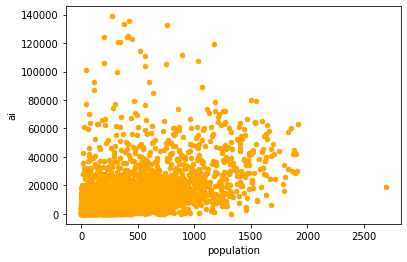

In [64]:
#Scatter plot
y = 'ai'
x = 'population'
df1 = data[data['population']>0]
df2 = df1[df1['ai']>0]
df = df2[df2['amenity']=='pharmacy']
df.plot.scatter(x, y, color ='orange')
linr = linregress(df['population'],df['ai'])

In [16]:
#correlationtable
df['ai'].corr(df['population']), df['ai'].corr(df['population'], method='spearman'), df['ai'].corr(df['population'], method='kendall')

(0.4541791561854329, 0.5407556371720139, 0.3819241119621523)

In [17]:
df['population'].corr(df['ai']), df['population'].corr(df['ai'], method='spearman'), df['population'].corr(df['ai'], method='kendall')

(0.45417915618543286, 0.5407556371720139, 0.3819241119621523)

In [44]:
#Standard deviation population
n_nonzero = np.count_nonzero(df['population'])
mean = np.sum(df['population'])/n_nonzero
quad = sum(pow((df['population']-mean),2))
variance = (1/n_nonzero)*quad
deviation = np.sqrt(variance)

deviation

370.7083456668992

In [24]:
#Standard deviation accessibility
n_nonzero = np.count_nonzero(df['ai'])
mean = np.sum(df['ai'])/n_nonzero
quad = sum(pow((df['ai']-mean),2))
variance = (1/n_nonzero)*quad
deviation = np.sqrt(variance)
deviation

16125.524012499742

In [39]:
#Covariance
n_nonzerox=np.count_nonzero(df['population'])
n_nonzeroy=np.count_nonzero(df['ai'])
meanx= np.sum(df['population'])/n_nonzerox
meany=np.sum(df['ai'])/n_nonzeroy
cxy = 0
df1 = list(df['population'])
df2 = list(df['ai'])

for i in range(len(df)):
    cxy = cxy + (df1[i]*df2[i]-meanx*meany)

cxy = (1/n_nonzerox)*cxy
cxy

2715022.2854061336

In [43]:
#Pearson r
r = 2715022.285/(370.71*16125.52)
r

0.45417724230688983

In [45]:
b = cxy/deviation
b

7323.876889045608

In [47]:
a = meany - b*meanx
a

-3040041.788587006

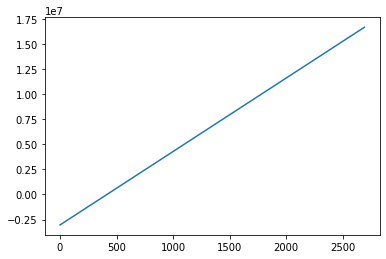

In [62]:
A = []
B = []
df = df.sort_values(by=['population'], ascending=True)
bib = list(df['population'])
for x in range(len(df['population'])):
    y = a+b*bib[x]
    A.append(bib[x])
    B.append(y)
    
A, B
#fig, ax = plt.subplots(dpi=500)
plt.plot(A,B)
#plt.scatter(data['population'],data['ai'], color ='orange')
#plt.show()

In [ ]:
#np.cov(data[x], data[y])
#np.polyfit(data['population'], data['ai'], 1)
#sp.shapiro(data[y])
sp.pearsonr(data[x], data[y])